## Problem Statement
This challenge is based on real school data of the CBSE Class 12 examination conducted in the year 2013.
You are given the grades obtained by students with specific but popular combinations of subjects (and all
these students had opted for Mathematics).
Their grades in four subjects are known to you. However their grade in Mathematics (i.e, the fifth subject) is hidden.
The records provided to you are the grades obtained by students who had opted for the following combinations of subjects or courses and obtained a passing grade in each subject. The individual subjects in the data are:
English, Physics, Chemistry, Mathematics, Computer Science, Biology, Physical Education, Economics,
Accountancy and Business Studies.

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import shutil
%matplotlib inline

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

#Other Libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report, regression,roc_auc_score
import warnings
warnings.filterwarnings("ignore")

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.regression module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
# Loading the training dataset
file = open("training.json","r")
first_line = file.readlines(1)
no_of_json_object = first_line[0]
# print(no_of_json_object)

training_data = open('training_data.json', 'w')
shutil.copyfileobj(file,training_data)

file.close()
training_data.close()

df = pd.read_json('training_data.json', lines=True)

In [3]:
df.head()

,Physics,Chemistry,PhysicalEducation,English,Mathematics,serial,Biology,Accountancy,BusinessStudies,Economics,ComputerScience
0,8.0,7.0,3.0,4,6,195490,NaN,NaN,NaN,NaN,NaN
1,1.0,1.0,1.0,3,3,190869,NaN,NaN,NaN,NaN,NaN
2,1.0,2.0,2.0,1,2,3111,NaN,NaN,NaN,NaN,NaN
3,8.0,7.0,6.0,7,7,47738,NaN,NaN,NaN,NaN,NaN
4,1.0,1.0,1.0,3,2,85520,NaN,NaN,NaN,NaN,NaN


In [4]:
df.tail()

,Physics,Chemistry,PhysicalEducation,English,Mathematics,serial,Biology,Accountancy,BusinessStudies,Economics,ComputerScience
79460,2.0,2.0,NaN,3,1,705,NaN,NaN,NaN,NaN,3.0
79461,6.0,4.0,NaN,5,5,155605,3.0,NaN,NaN,NaN,NaN
79462,NaN,NaN,NaN,3,5,55508,NaN,2.0,3.0,3.0,NaN
79463,2.0,2.0,1.0,1,1,136471,NaN,NaN,NaN,NaN,NaN
79464,2.0,3.0,NaN,3,2,180880,NaN,NaN,NaN,2.0,NaN


In [5]:
df.isna().sum()/(79465) * 100

Physics              17.259171
Chemistry            17.174857
PhysicalEducation    59.223558
English               0.000000
Mathematics           0.000000
serial                0.000000
Biology              81.308752
Accountancy          82.934625
BusinessStudies      83.062984
Economics            82.341912
ComputerScience      76.694142
dtype: float64

In [6]:
df.shape

(79465, 11)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79465 entries, 0 to 79464
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Physics            65750 non-null  float64
 1   Chemistry          65817 non-null  float64
 2   PhysicalEducation  32403 non-null  float64
 3   English            79465 non-null  int64  
 4   Mathematics        79465 non-null  int64  
 5   serial             79465 non-null  int64  
 6   Biology            14853 non-null  float64
 7   Accountancy        13561 non-null  float64
 8   BusinessStudies    13459 non-null  float64
 9   Economics          14032 non-null  float64
 10  ComputerScience    18520 non-null  float64
dtypes: float64(8), int64(3)
memory usage: 6.7 MB


In [8]:
df.describe()

,Physics,Chemistry,PhysicalEducation,English,Mathematics,serial,Biology,Accountancy,BusinessStudies,Economics,ComputerScience
count,65750.000000,65817.000000,32403.000000,79465.000000,79465.000000,79465.000000,14853.000000,13561.000000,13459.000000,14032.000000,18520.000000
mean,3.992593,3.983971,3.186032,3.072044,4.247858,111242.377638,3.599004,2.613672,2.893751,2.469142,3.876350
std,2.213173,2.165750,1.912542,1.796456,2.357411,64406.827932,2.071209,1.748936,1.952590,1.727387,2.150361
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,2.000000,2.000000,2.000000,2.000000,55404.000000,2.000000,1.000000,1.000000,1.000000,2.000000
50%,4.000000,4.000000,3.000000,3.000000,4.000000,111250.000000,3.000000,2.000000,2.000000,2.000000,4.000000
75%,6.000000,6.000000,4.000000,4.000000,6.000000,167014.000000,5.000000,4.000000,4.000000,3.000000,6.000000
max,8.000000,8.000000,8.000000,8.000000,8.000000,222844.000000,8.000000,8.000000,8.000000,8.000000,8.000000


In [9]:
df.columns

Index(['Physics', 'Chemistry', 'PhysicalEducation', 'English', 'Mathematics',
       'serial', 'Biology', 'Accountancy', 'BusinessStudies', 'Economics',
       'ComputerScience'],
      dtype='object')

In [10]:
df['serial'].unique()

array([195490, 190869,   3111, ...,  55508, 136471, 180880], dtype=int64)

In [11]:
df.drop(["serial"],axis=1,inplace=True)

In [12]:
df.head()

,Physics,Chemistry,PhysicalEducation,English,Mathematics,Biology,Accountancy,BusinessStudies,Economics,ComputerScience
0,8.0,7.0,3.0,4,6,NaN,NaN,NaN,NaN,NaN
1,1.0,1.0,1.0,3,3,NaN,NaN,NaN,NaN,NaN
2,1.0,2.0,2.0,1,2,NaN,NaN,NaN,NaN,NaN
3,8.0,7.0,6.0,7,7,NaN,NaN,NaN,NaN,NaN
4,1.0,1.0,1.0,3,2,NaN,NaN,NaN,NaN,NaN


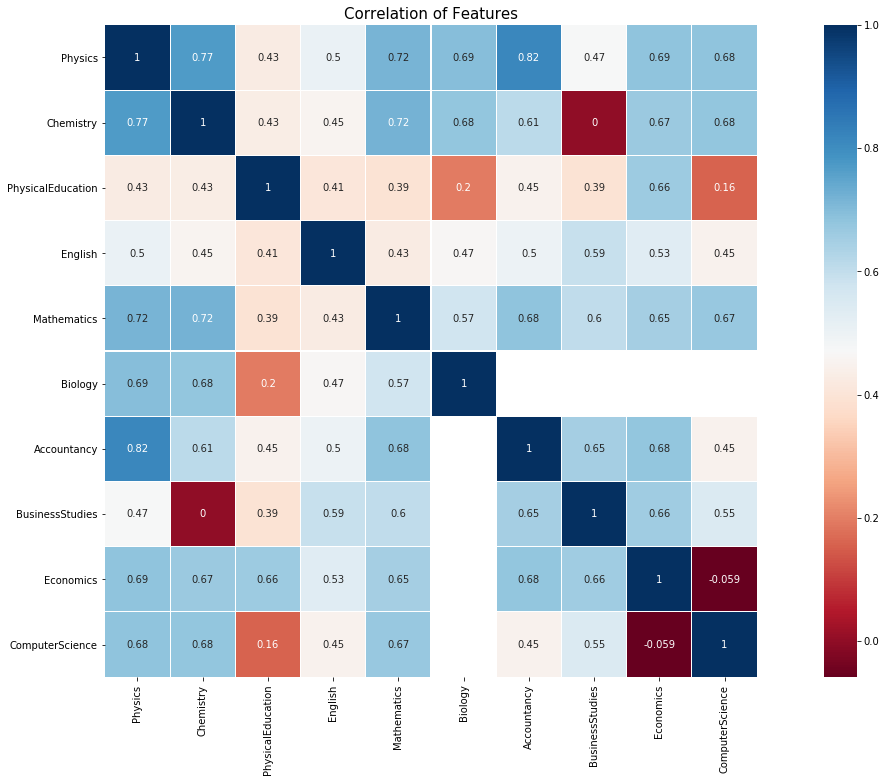

In [13]:
# Plotting Correlation Matrix to find out the correlation of the features
colormap = plt.cm.RdBu
plt.figure(figsize=(24,12))
plt.title('Correlation of Features', size=15)
sns.heatmap(df.corr(), linewidths=0.1, vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

In [14]:
# Importing iterative imputer to fill in the NaN Values iteratively
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer as MICE

In [15]:
df = pd.DataFrame(MICE().fit_transform(df))
df.columns = ['Physics','Chemistry','PhysicalEducation','English','Mathematics','Biology',
             'Accountancy','BusinessStudies','Economics','ComputerScience']

In [16]:
df.head()

,Physics,Chemistry,PhysicalEducation,English,Mathematics,Biology,Accountancy,BusinessStudies,Economics,ComputerScience
0,8.0,7.0,3.0,4.0,6.0,3.533094,6.036791,1.880538,2.602312,0.343512
1,1.0,1.0,1.0,3.0,3.0,3.547908,1.080806,3.890006,2.364831,-0.004751
2,1.0,2.0,2.0,1.0,2.0,3.618941,0.672716,3.389050,2.396406,4.679284
3,8.0,7.0,6.0,7.0,7.0,3.648200,4.090021,2.179944,2.567548,8.187511
4,1.0,1.0,1.0,3.0,2.0,3.549963,1.554960,3.780457,2.378433,0.122850


In [17]:
df.isna().sum()

Physics              0
Chemistry            0
PhysicalEducation    0
English              0
Mathematics          0
Biology              0
Accountancy          0
BusinessStudies      0
Economics            0
ComputerScience      0
dtype: int64

In [18]:
df.isnull().any(axis=1).sum()

0

In [20]:
#sns.countplot(df['Physics'])
df['Physics'].value_counts()

1.000000    10778
2.000000    10137
3.000000     9418
4.000000     8928
5.000000     7914
            ...  
8.607907        1
7.304268        1
5.807638        1
4.081276        1
4.620199        1
Name: Physics, Length: 5188, dtype: int64

In [21]:
#sns.countplot(df['Chemistry'])
df['Chemistry'].value_counts()

2.000000    10520
1.000000    10116
3.000000     9953
4.000000     8465
5.000000     8261
            ...  
4.260505        1
5.099429        1
5.165966        1
4.510660        1
3.723827        1
Name: Chemistry, Length: 5129, dtype: int64

1.0    19805
2.0    15796
3.0    14382
4.0    11356
5.0     8899
6.0     5821
7.0     2516
8.0      890
Name: English, dtype: int64

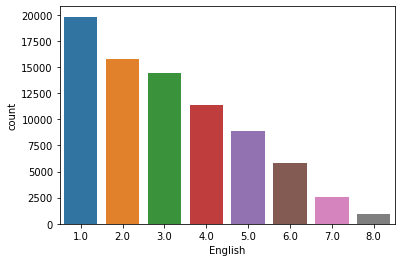

In [29]:
sns.countplot(df['English'])
df['English'].value_counts()

In [23]:
#sns.countplot(df['Biology'])
df['Biology'].value_counts()

1.000000     3019
2.000000     2434
3.000000     2322
4.000000     2133
5.000000     1870
             ... 
15.521104       1
13.303104       1
3.929288        1
5.000287        1
3.780616        1
Name: Biology, Length: 22071, dtype: int64

In [24]:
#sns.countplot(df['Accountancy'])
df['Accountancy'].value_counts()

 1.000000    4918
 2.000000    2978
 3.000000    2088
 4.000000    1390
 5.000000    1041
             ... 
 8.761897       1
-2.292135       1
 6.146387       1
-1.993063       1
 2.120205       1
Name: Accountancy, Length: 22844, dtype: int64

In [25]:
#sns.countplot(df['BusinessStudies'])
df['BusinessStudies'].value_counts()

1.000000    4435
2.000000    2689
3.000000    2040
4.000000    1452
5.000000    1124
            ... 
2.225757       1
2.068917       1
1.663263       1
2.844250       1
2.972070       1
Name: BusinessStudies, Length: 22944, dtype: int64

In [26]:
#sns.countplot(df['Economics'])
df['Economics'].value_counts()

1.000000    5683
2.000000    3185
3.000000    1815
4.000000    1359
2.496482     906
            ... 
4.190213       1
3.106423       1
2.181436       1
2.592380       1
2.811199       1
Name: Economics, Length: 22816, dtype: int64

In [27]:
#sns.countplot(df['ComputerScience'])
df['ComputerScience'].value_counts()

 2.000000    3160
 1.000000    3040
 3.000000    2712
 4.000000    2471
 5.000000    2258
             ... 
 3.586248       1
 3.827263       1
-1.360339       1
 3.951095       1
 2.843173       1
Name: ComputerScience, Length: 21135, dtype: int64

In [28]:
#sns.countplot(df['PhysicalEducation'])
df['PhysicalEducation'].value_counts()

1.000000    7558
2.000000    6950
3.000000    5404
4.000000    4546
5.000000    3401
            ... 
5.076855       1
2.013188       1
4.992429       1
3.956380       1
4.831403       1
Name: PhysicalEducation, Length: 17302, dtype: int64

1.0    12401
2.0    11461
3.0    10546
8.0    10091
4.0     9609
5.0     9583
7.0     8872
6.0     6902
Name: Mathematics, dtype: int64

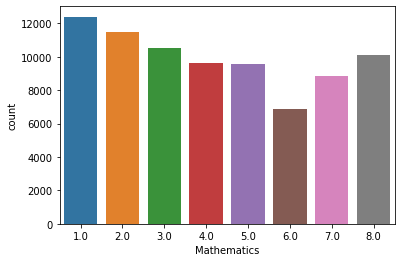

In [30]:
sns.countplot(df['Mathematics'])
df['Mathematics'].value_counts()

In [31]:
# Dividing X and y from the dataset
X = df.drop(['Mathematics'], axis=1)
y = df['Mathematics']
print(X.shape)
print(y.shape)
xData = X.values
yData = y.values

(79465, 9)
(79465,)


In [32]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(xData, yData, test_size=0.20, random_state=0)

In [33]:
# Lets implement simple classifiers

classifiers = {
    "LogisticRegression": LogisticRegression(),
    "KNeighborsClassifier": KNeighborsClassifier(),
    "SupportVectorClassifier": SVC(),
    "RandomForestClassifier": RandomForestClassifier(),
}

In [34]:
# Applying cross validation
from sklearn.model_selection import cross_val_score

for key, classifier in classifiers.items():
    classifier.fit(X_train,y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=4)
    print("Classifier: ", classifier.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")

Classifier:  LogisticRegression Has a training score of 70.0 % accuracy score
Classifier:  KNeighborsClassifier Has a training score of 63.0 % accuracy score
Classifier:  SVC Has a training score of 89.0 % accuracy score
Classifier:  RandomForestClassifier Has a training score of 95.0 % accuracy score


### From the cross val score we can say that Random Forest performance is the best so we will go ahead with Random Forest

In [35]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)

#prediction
y_pred = rfc.predict(X_test)

In [36]:
# Evaluating Model by calculating Accuracy, Precision, Recall and F1-Score
acc = accuracy_score(y_test,y_pred)
print("Accuracy = {}".format(acc))

Accuracy = 0.9621216887938085


In [37]:
prec = precision_score(y_test,y_pred, average='weighted')
print("Precision = {}".format(prec))

rec = recall_score(y_test,y_pred, average='weighted')
print("Recall = {}".format(rec))

f1 = f1_score(y_test,y_pred, average='weighted')
print("F1-Score = {}".format(f1))

Precision = 0.962194260480788
Recall = 0.9621216887938085
F1-Score = 0.9621181151282016


[[2365   46    6    0    0    0    0    0]
 [   9 2181   50    1    0    0    0    0]
 [   2   16 1981   57    1    1    0    1]
 [   0    1   26 1931   51    2    0    0]
 [   0    0    0   34 1863   42    3    2]
 [   0    0    0    1   43 1311   53    6]
 [   0    1    1    1    4   27 1678   73]
 [   0    1    0    1    1    0   38 1981]]


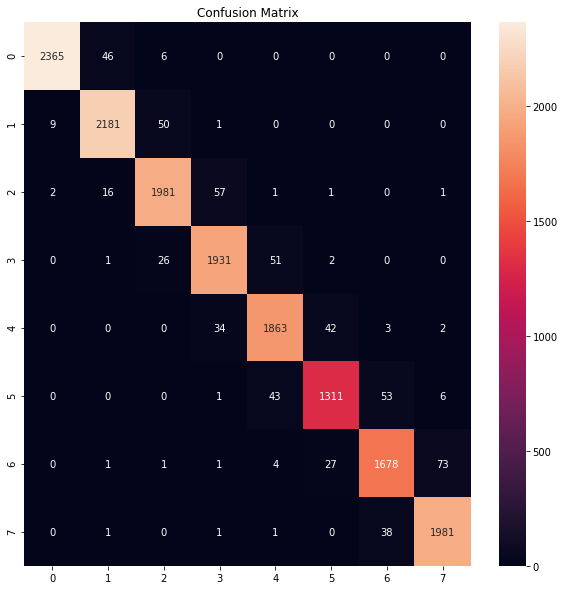

In [40]:
# Plotting the confusion matrix
from sklearn.metrics import confusion_matrix
LABElS = ['Original Score','Predicted Score']
con_matrix = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(10,10))
sns.heatmap(con_matrix, annot=True, fmt="d")
plt.title("Confusion Matrix")
#plt.ylabel("Original Class")
#plt.xlabel("Predicted Class")
print(con_matrix)
plt.show()